In [11]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

from mi_modulo import *

In [12]:
ensayo3_excel = r"C:\Users\nicol\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S04_parciales\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\nicol\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S04_parciales\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\nicol\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"
# Leemos archivo xlsx de ensayo con 109 sujetos 
ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [13]:
# Creamos una lista de matrices de conectividad por sujeto
ensayos3_dfs = lista_dfs(ensayo3_dict)
ensayos4_dfs = lista_dfs(ensayo4_dict)

In [14]:
# Creamos una matriz de conectividad a partir de la lista de 109 sujetos
resultado3_df = capsula(ensayos3_dfs, 0.5, 0.6)
resultado4_df = capsula(ensayos4_dfs, 0.4, 0.7)

# Generar estadísticos para decidir umbrales 

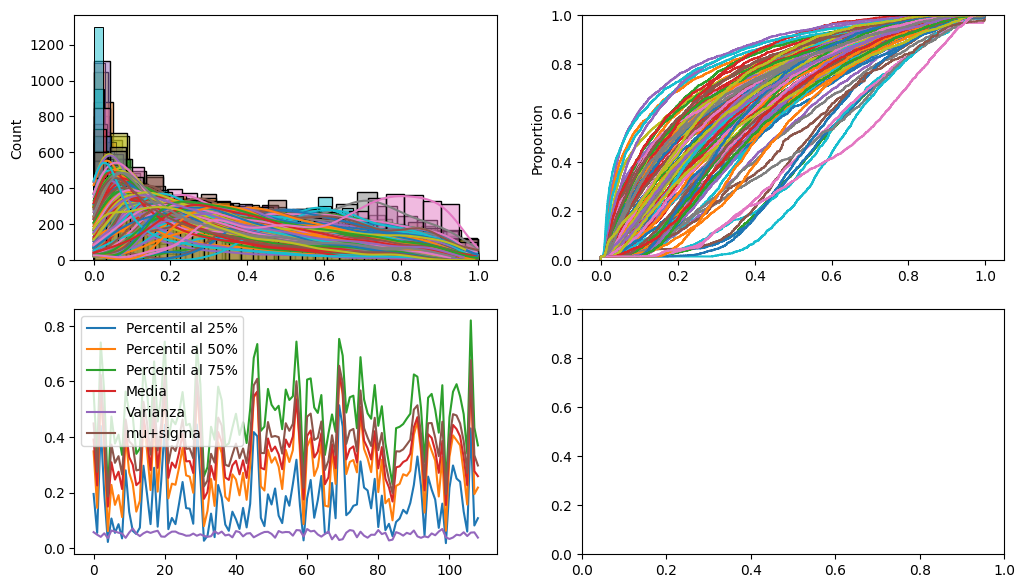

In [15]:
# Análisis para ensayo3
ensayos_dfs = ensayos3_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()


In [16]:
from scipy import stats

In [17]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_

In [18]:
# test_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
#                                index=['min', 'max', 'mediana', 'cosa_rara'])
# estadisticos_ = [th25, th50, th75, promedio, mu_sigma]

# for idx, columna in enumerate(test_df.columns):
#     test_df[columna] = [np.min(estadisticos_[idx]), np.min(estadisticos_[idx]), 
#                         np.median(min(estadisticos_[idx])), stats.median_abs_deviation(estadisticos_[idx])]
# test_df

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 3')

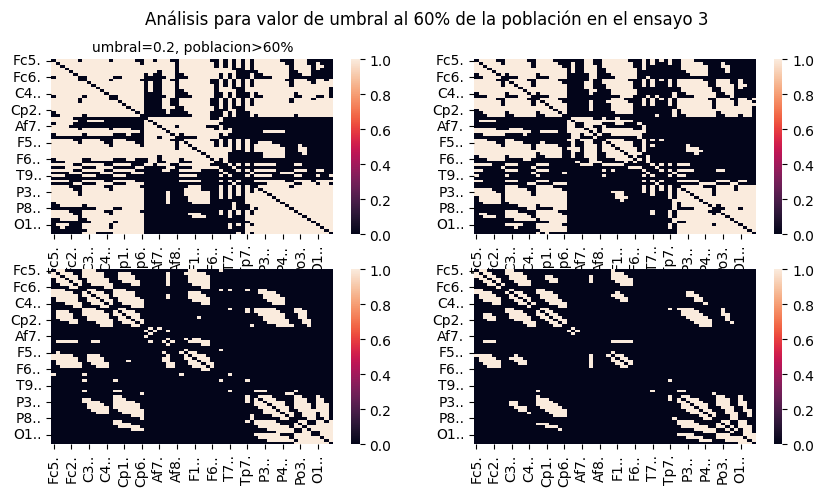

In [19]:
# Análisis para valor de umbral al 60% de la población en el ensayo 3
resultado3_df1 = capsula(ensayos3_dfs, 0.2, 0.6)
resultado3_df2 = capsula(ensayos3_dfs, 0.3, 0.6)
resultado3_df3 = capsula(ensayos3_dfs, 0.5, 0.6)
resultado3_df4 = capsula(ensayos3_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado3_df1, ax=axes[0, 0])
sns.heatmap(resultado3_df2, ax=axes[0, 1])
sns.heatmap(resultado3_df3, ax=axes[1, 0])
sns.heatmap(resultado3_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 3')

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 4')

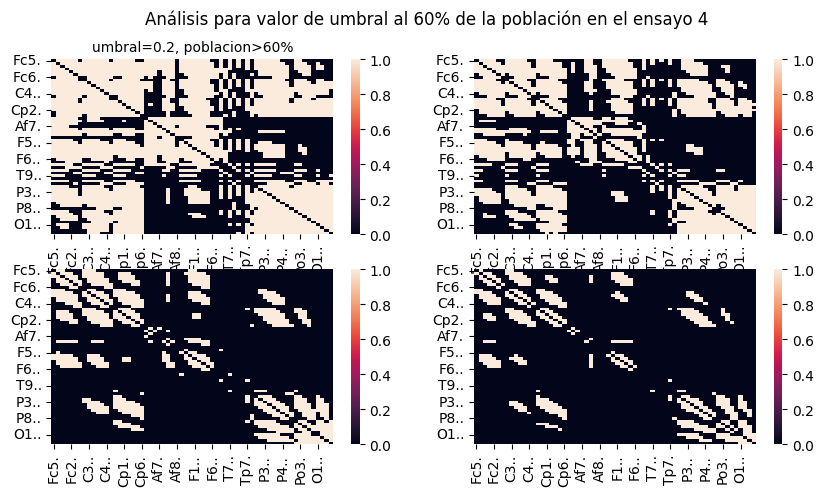

In [20]:
resultado4_df1 = capsula(ensayos4_dfs, 0.2, 0.6)
resultado4_df2 = capsula(ensayos4_dfs, 0.3, 0.6)
resultado4_df3 = capsula(ensayos4_dfs, 0.5, 0.6)
resultado4_df4 = capsula(ensayos4_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado4_df1, ax=axes[0, 0])
sns.heatmap(resultado4_df2, ax=axes[0, 1])
sns.heatmap(resultado4_df3, ax=axes[1, 0])
sns.heatmap(resultado4_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 4')

# Generación de resultados

Después del análisis realizado, utilizando los mapas de calor, **para escoger un threshold** adecuado **y un porcentaje** de la población que cumpla dicho umbral; se procederá a generar los resultados.

Resultados a generar:
- Grafo2D
- Grafo3D
- Métricas de grafo
- Gráfico de comunidades con Hub

In [21]:
# Convertir de dataframe a grafo
ensayo3_grafo_ = nx.from_pandas_adjacency(resultado3_df3)
ensayo4_grafo_ = nx.from_pandas_adjacency(resultado4_df1)

In [22]:
# Cálculo de métricas por ensayo
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)

(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)

In [23]:
# Construcción de dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

In [24]:
# Para esto, se necesitan instalar paquetes que no se vieron en clase, por tanto, es opcional
# %matplotlib widget

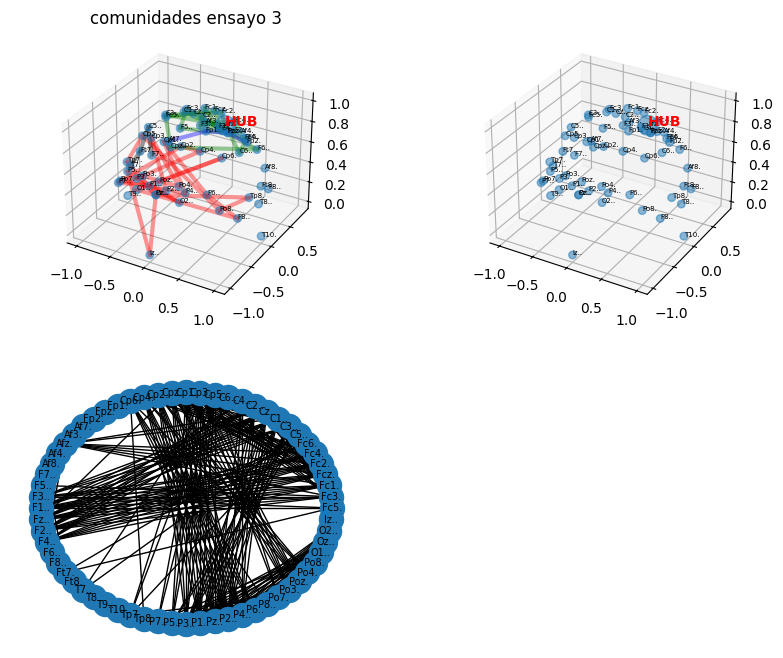

In [25]:
# Grafo de resultados para ensayo 3
hub = betwenness_3[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_3, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado3_df3, axes[2])

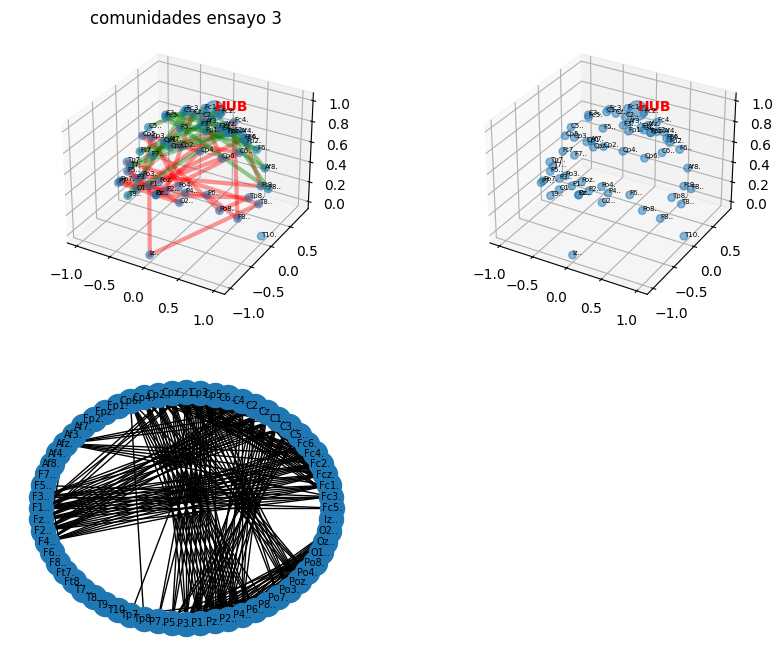

In [26]:
# Grafo de resultados para ensayo 4
hub = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_4, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado4_df3, axes[2])

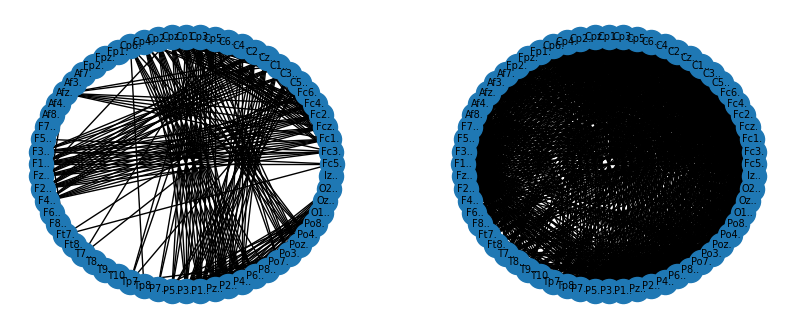

In [49]:
# Grafo2 para ensayos 5 y 6
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultado3_df3, axes[0])
ensayo_grafo = grafo2D(resultado4_df1, axes[1])

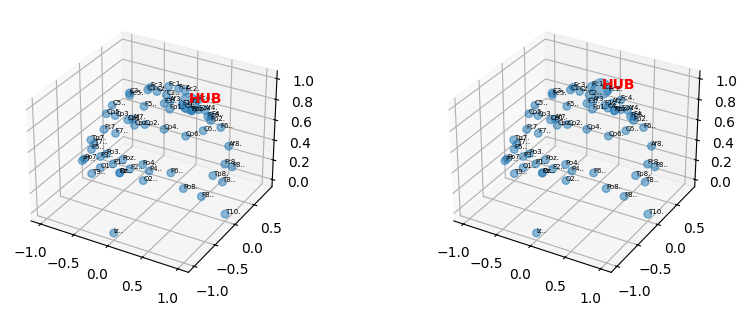

In [48]:
# Grafo3D para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo3D(eeg_coords, hub3, axes[0])
grafo3D(eeg_coords, hub4, axes[1])

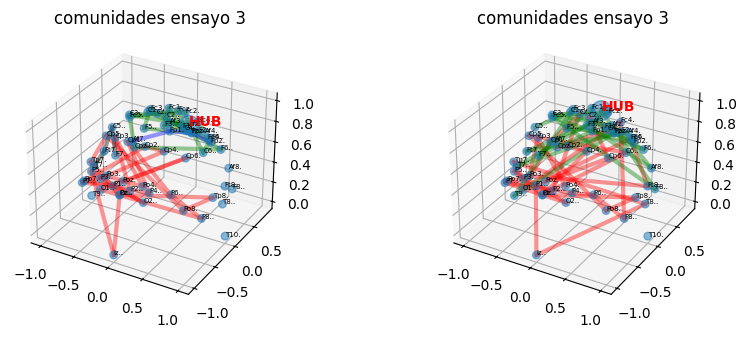

In [29]:
# Comunidades para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo_comunidades(communities_3, hub3, eeg_coords, axes[0])
grafo_comunidades(communities_4, hub4, eeg_coords, axes[1])

# 
Leer datos
generar lista de dataframes
compactar a 1 dataframe
    hacer análisis sobre umbrales por ensayo
analizamos resultado con mapa de calor
observamos resultado en grafo 2D
observamos resultado en grafo 3D

Conocimiento previo, expertice
Análisis de literatura
Lógica



In [30]:
ensayo5_excel = r"C:\Users\nicol\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo6_excel = r"C:\Users\nicol\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_06.xlsx"
coordenadas_csv = r"C:\Users\nicol\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"
# Leemos archivo xlsx de ensayo con 109 sujetos 
ensayo5_dict = pd.read_excel(ensayo5_excel, sheet_name=None, index_col=0)
ensayo6_dict = pd.read_excel(ensayo6_excel, sheet_name=None, index_col=0)

In [31]:
ensayos5_dfs = lista_dfs(ensayo5_dict)
ensayos6_dfs = lista_dfs(ensayo6_dict)

In [32]:
resultado5_df = capsula(ensayos5_dfs, 0.5, 0.6)
resultado6_df = capsula(ensayos6_dfs, 0.4, 0.7)

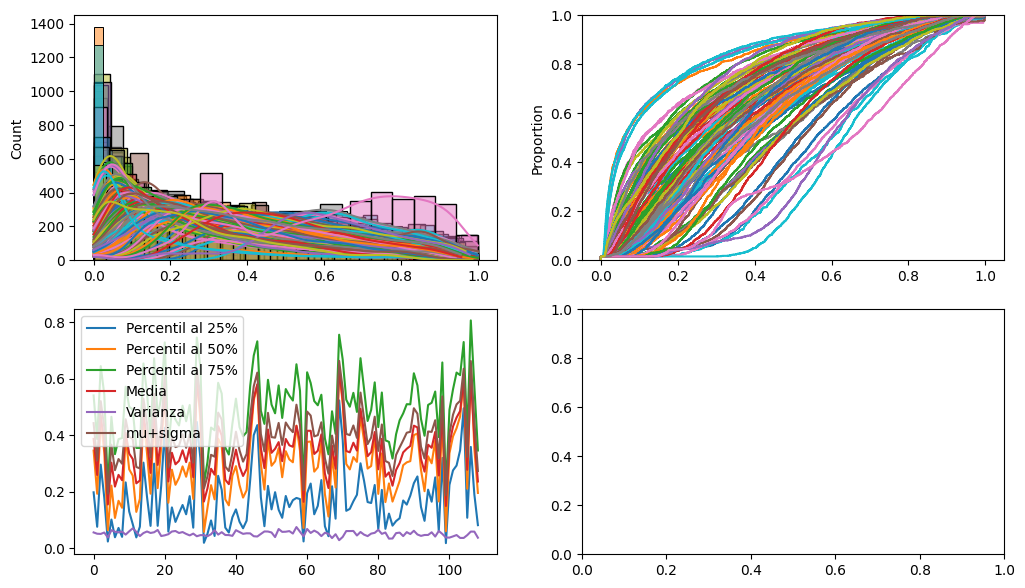

In [33]:
# Análisis para ensayo 5
ensayos_dfs = ensayos5_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

In [34]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 5')

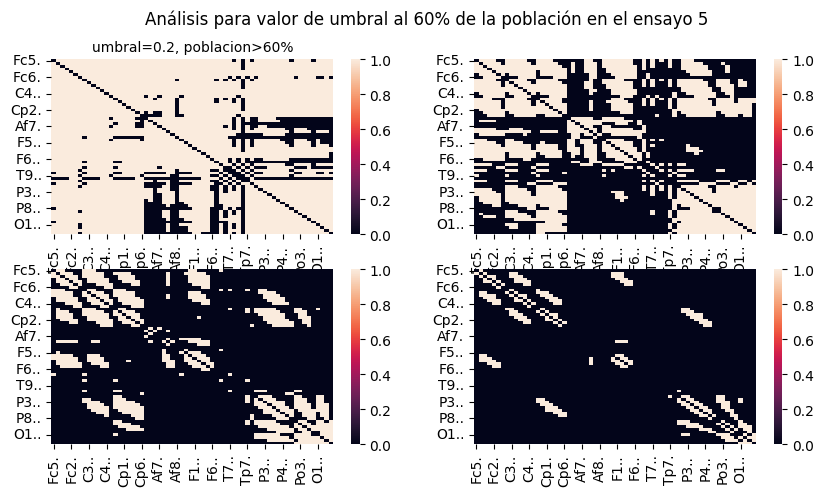

In [50]:
# Análisis para valor de umbral al 60% de la población en el ensayo 5
resultado5_df1 = capsula(ensayos5_dfs, 0.1, 0.6)
resultado5_df2 = capsula(ensayos5_dfs, 0.3, 0.6)
resultado5_df3 = capsula(ensayos5_dfs, 0.5, 0.6)
resultado5_df4 = capsula(ensayos5_dfs, 0.7, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado5_df1, ax=axes[0, 0])
sns.heatmap(resultado5_df2, ax=axes[0, 1])
sns.heatmap(resultado5_df3, ax=axes[1, 0])
sns.heatmap(resultado5_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 5')

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 6')

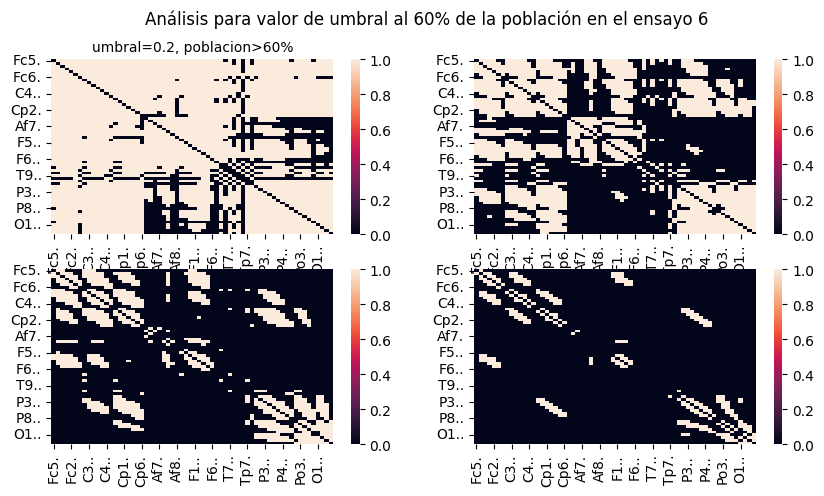

In [52]:
resultado6_df1 = capsula(ensayos6_dfs, 0.1, 0.6)
resultado6_df2 = capsula(ensayos6_dfs, 0.3, 0.6)
resultado6_df3 = capsula(ensayos6_dfs, 0.5, 0.6)
resultado6_df4 = capsula(ensayos6_dfs, 0.7, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado6_df1, ax=axes[0, 0])
sns.heatmap(resultado6_df2, ax=axes[0, 1])
sns.heatmap(resultado6_df3, ax=axes[1, 0])
sns.heatmap(resultado6_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 6')

# Generación de resultados

In [53]:
# Convertir de dataframe a grafo
ensayo5_grafo_ = nx.from_pandas_adjacency(resultado5_df3)
ensayo6_grafo_ = nx.from_pandas_adjacency(resultado6_df1)

In [54]:
# Cálculo de métricas por ensayo
(clust_coeff_5, path_length_5, small_world_sigma_5, communities_5, 
 modularity_5, betwenness_5, global_eff_5, local_eff_5, degree_dict_5) = metricas_grafo(ensayo5_grafo_)

(clust_coeff_6, path_length_6, small_world_sigma_6, communities_6, 
 modularity_6, betwenness_6, global_eff_6, local_eff_6, degree_dict_6) = metricas_grafo(ensayo6_grafo_)

In [55]:
# Construcción de dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

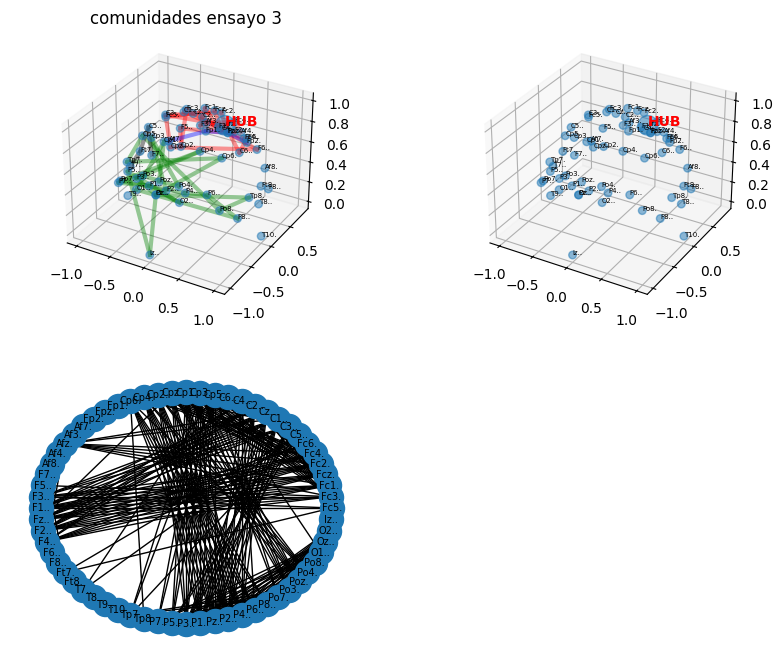

In [56]:
# Grafo de resultados para ensayo 5
hub = betwenness_5[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_5, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado5_df3, axes[2])

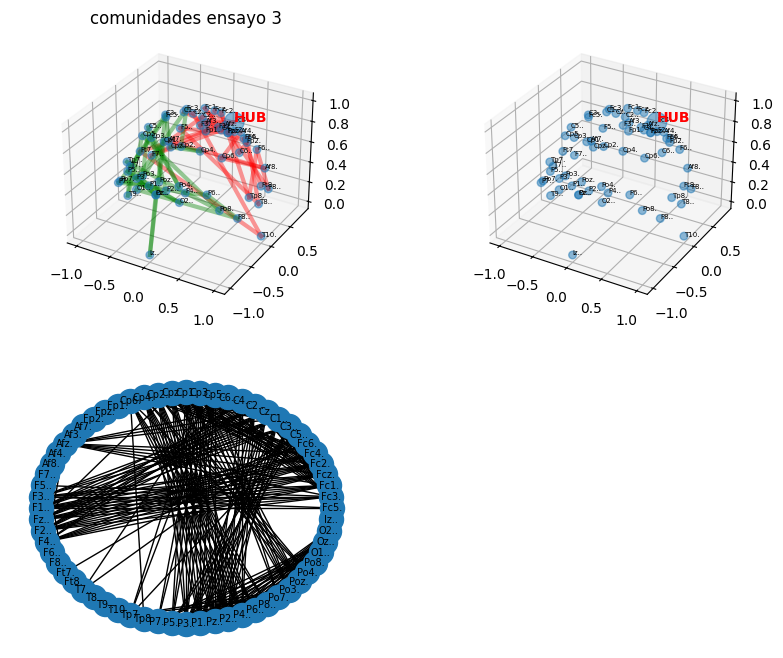

In [57]:
# Grafo de resultados para ensayo 6
hub = betwenness_6[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_6, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado6_df3, axes[2])

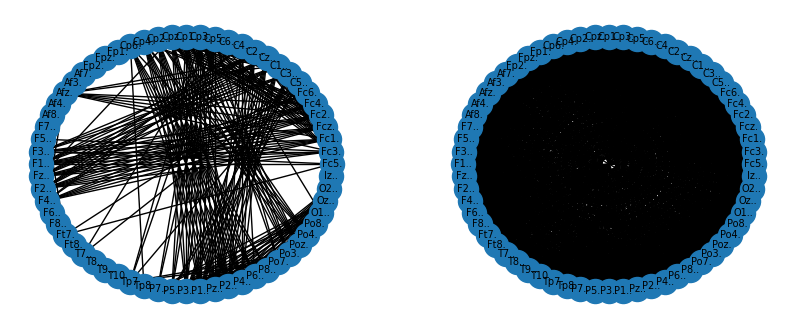

In [58]:
# Grafo2 para ensayos 5 y 6
hub3 = betwenness_5[0]
hub4 = betwenness_6[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultado5_df3, axes[0])
ensayo_grafo = grafo2D(resultado6_df1, axes[1])

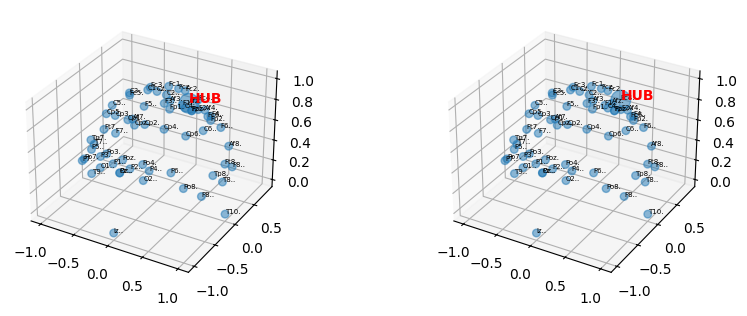

In [59]:
# Grafo3D para ensayos 5 y 6
hub5 = betwenness_5[0]
hub6 = betwenness_6[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo3D(eeg_coords, hub5, axes[0])
grafo3D(eeg_coords, hub6, axes[1])

# Conclusiones

Cada ensayo muestra una reorganización de la red funcional entre tareas de imaginación(ensayo 3 y 5) y movimiento(ensayo 4 y 6).
La centralidad frontal (Fz) en ensayo 3 y 4 muestran que la planificación y el control atencional son importantes para la ejecución de movimientos,incluso cuando ya se está realizando el movimiento(ensayo 4).El hub no solo es ejecutor motor,si no también controlador cognitivo.
De acuerdo al ensayo 5 podemos obserevar que el hub se encuentra lateralizado hacia la corteza izquierda(C3) por lo que este hub es quien controla la actividad bilateral,esto indica que el hemisferio izquierdo es el centro de control de la red de imaginación.
En cuanto al ensayo 6 el hub se encuentra más lateralizado hacia regiones central-parietales ,es menos lateralizado y más amplio que el de el ensayo 5.Su alta centralidad está bien emparejada a las representaciones motoras en la corteza de pies y piernas (de acuerdo al homúnculo motor) por lo que se confirma que esa región es importante y está implicada en la ejecución de movimientos.Además la activación parietal es importante para procesar la información espacial y somatosensorial mientras se ejecutan los movimientos.


